## ***Distribution of Categorical and Continuous Variables: Visualization***

___
### Introduction to the Dataset

The **Adult dataset**, also known as the **Census Income dataset**, was originally collected by the U.S. Census Bureau. It contains demographic information about individuals from the United States, and its primary purpose is to predict whether a person earns more than $50K per year based on various attributes. The data comes from the U.S. Census and includes individuals from different regions across the country, representing a sample of U.S. citizens and reflecting socio-economic trends at the time of data collection.

The dataset includes **15 columns** with both categorical and continuous variables that represent key socio-economic characteristics, such as age, education, occupation, marital status, work hours, and other demographic factors.

### Aim of the Project

The goal of this project is to visualize the distribution of various variables in the Adult dataset. Specifically, it is aimed to:

- Create **bar charts** to visualize the distribution of categorical variables like gender and marital status. These visualizations will help in understanding how different categories of these variables are represented in the dataset.
- Create **histograms** to show the distribution of continuous variables like age and hours per week. This will allow us to analyze the spread, central tendencies, and ranges of these variables, providing insights into the general demographic and working patterns of the individuals in the dataset.

In this project, the focus will be on the following variables:

- **Categorical Variables**: Gender, Marital Status
- **Continuous Variables**: Age, Hours per Week
___

### 1,Improt necessary libraries

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### 2,Load the dataset

In [2]:
df_adult=pd.read_csv("Adult_data.csv")
print(df_adult.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

### 3,Data Cleaning

### _3.1 Check and handle for duplicated rows_

In [3]:
df_adult.duplicated().sum()
df_adult_cleaned=df_adult.drop_duplicates()
df_adult_cleaned.duplicated().sum()
import warnings 

#### _Concise summary of the dataset_

In [4]:
df_adult_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


___
#### _Observation_

- The dataset now contains 32,537 entries and 15 columns after removing duplicate rows.
- There are 6 numerical columns (int64) and 9 categorical columns (object).
- All columns have non-null values, meaning there are no missing entries.
___

### _3.2 Selecting a Subset of Columns from the Dataset_

In [5]:
# Keep only the relevant columns
df_subset = df_adult_cleaned[['sex', 'marital-status', 'age', 'hours-per-week']]

# Display the first few rows of the reduced dataset to check
print(df_subset.head())

      sex      marital-status  age  hours-per-week
0    Male       Never-married   39              40
1    Male  Married-civ-spouse   50              13
2    Male            Divorced   38              40
3    Male  Married-civ-spouse   53              40
4  Female  Married-civ-spouse   28              40


___
#### _Reason for Taking a Subset of Columns_

The decision to take a subset of columns from the original dataset is driven by the aim of the project, which focuses on visualizing the distributions of two categorical variables (sex and marital status) and two continuous variables (age and hours per week). By selecting only these variables, we can streamline our analysis to directly address the project objectives.
___


### 4,Visualization : Distribution of categorical and continous variables

#### _4.1 Bar chart for sex distribution_

#### _Using seaborn_

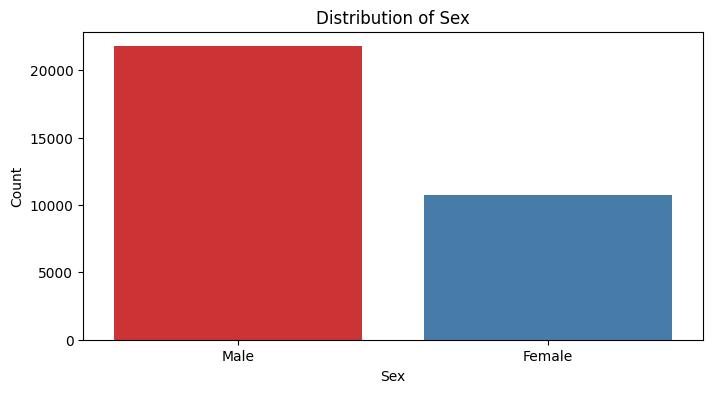

In [6]:
# Ignore all warnings
warnings.filterwarnings("ignore")

# Create the count plot using Seaborn
plt.figure(figsize=(8, 4))  # Optional: Set the figure size

# Create a count plot for 'sex' distribution
sns.countplot(
    data=df_subset,  # Your DataFrame
    x='sex',  # The column to plot
    palette='Set1'  # Use a Seaborn color palette (similar to Plotly's Set1)
)

# Set the labels and title
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()


#### _Using plotly.express for better interactivity_

In [ ]:
# Create a new column with the count of each 'sex' category
df_sex_counts = df_subset['sex'].value_counts().reset_index()
df_sex_counts.columns = ['sex', 'count']

# Create the interactive bar chart for 'sex' distribution with distinct colors
fig1 = px.bar(
    df_sex_counts,
    x='sex',
    y='count',
    title='Distribution of Sex',
    labels={'sex': 'Sex', 'count': 'Count'},
    color='sex',  # Color by 'sex' to apply different colors to each bar
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a color sequence with distinct colors
)

# Update layout for better visualization
fig1.update_layout(
    xaxis_title="Sex",
    yaxis_title="Count",
    template="plotly_white"
)

# Show the interactive plot
fig1.show()


#### _Watching on github? please go to the images folder to see the output for plotty.express interactive graph._

#### _Interpretation of the Bar Chart for 'Sex' Distribution_

The bar chart for the 'sex' distribution in the Adult dataset reveals the following:

    There are 21,775 males (approximately 67%) and 10,762 females (approximately 33%) in the dataset. This indicates that the dataset has a higher representation of males compared to females, with males making up nearly two-thirds of the sample.

    The bar chart visually reinforces this imbalance in gender representation, showing a more prominent bar for males compared to females.

#### _4.2 Bar chart for martial status distribution_

#### _Using seaborn_

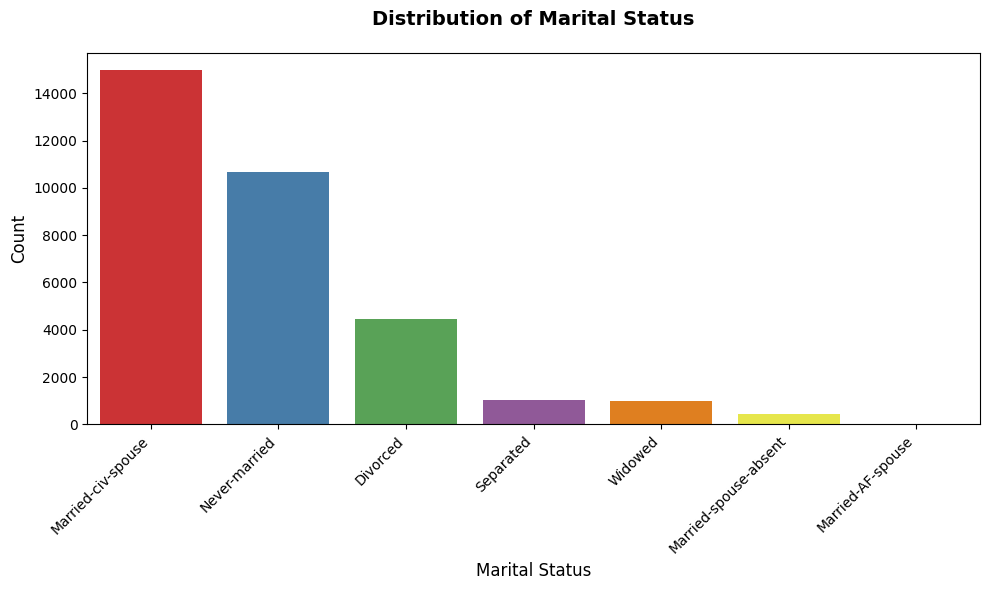

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot for 'marital-status' distribution using Seaborn
sns.barplot(
    x='marital-status', 
    y='count', 
    data=df_marital_counts,  # Replace with the DataFrame for marital-status counts
    palette='Set1'  # Use a color palette for distinct colors
)

# Add titles and labels
plt.title('Distribution of Marital Status', fontsize=14, weight='bold', pad=20)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#### _Using plotly.express for better interactivity_

In [ ]:
# Create a new column with the count of each 'marital-status' category
df_marital_counts = df_subset['marital-status'].value_counts().reset_index()
df_marital_counts.columns = ['marital-status', 'count']

# Create the interactive bar chart for 'marital-status' distribution with distinct colors
fig2 = px.bar(
    df_marital_counts,
    x='marital-status',
    y='count',
    title='Distribution of Marital Status',
    labels={'marital-status': 'Marital Status', 'count': 'Count'},
    color='marital-status',  # Color by 'marital-status' to apply different colors to each bar
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a color sequence with distinct colors
)

# Update layout for better visualization
fig2.update_layout(
    xaxis_title="Marital Status",
    yaxis_title="Count",
    template="plotly_white",
    xaxis_tickangle=-45  # Tilt x-axis labels for better readability
)

# Show the interactive plot
fig2.show()

#### _Watching on github? please go to the images folder to see the output for plotty.express interactive graph._

___
### _Interpretation of Marital Status Distribution_

- **Married-civ-spouse (14,970)**: The largest group, indicating that most individuals in the dataset are married and living with their spouse.
- **Never-married (10,667)**: The second-largest group, representing a significant portion of single individuals, likely reflecting younger age groups.
- **Divorced (4,441)**: A notable portion of individuals have experienced divorce, suggesting a trend of marital separation.
- **Separated (1,025)**: A smaller group, indicating individuals who are separated but not divorced.
- **Widowed (993)**: Relatively few individuals are widowed, suggesting fewer older individuals in the dataset.
- **Married-spouse-absent (418)**: A small group representing married individuals whose spouses are absent for various reasons.
- **Married-AF-spouse (23)**: The smallest group, indicating individuals married to armed forces spouses.

### General Insights

- The dataset is predominantly composed of married individuals, with significant numbers of never-married and divorced individuals.
- Smaller groups include those separated, widowed, or in specific marital situations, reflecting a mix of relationship statuses across various demographics.
___

#### _4.3 Histogram for age_

#### _Using seaborn_

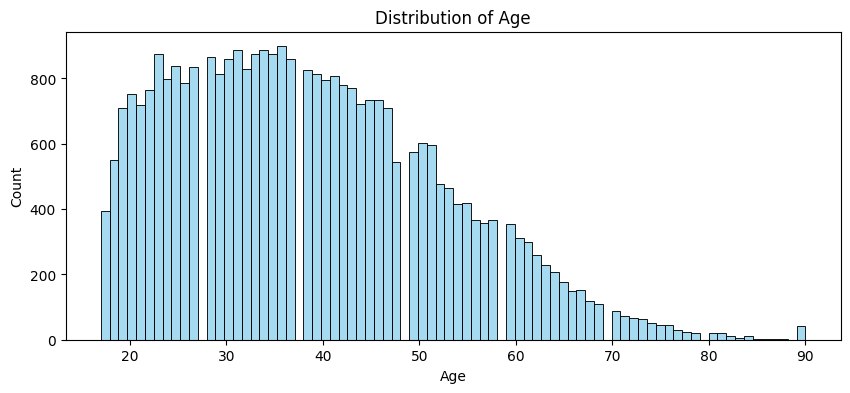

In [ ]:
# Create the histogram for 'age' distribution using Seaborn
plt.figure(figsize=(10, 4))  # Set the figure size

# Create the histogram for 'age' distribution
sns.histplot(
    data=df_subset,       # Your DataFrame
    x='age',              # The column to plot
    kde=False,            # Set to True if you want to overlay a kernel density estimate
    color='skyblue',      # Choose a single color for the bars
    bins=80,              # Number of bins, can be adjusted based on your data
    stat='count'          # Use the count for the y-axis
)

# Set the title, x and y labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()


#### _Using plotly.express for better interactivity_

In [ ]:
# Create the interactive histogram for 'age' distribution
fig3 = px.histogram(
    df_subset,  # Use the cleaned subset of the dataset
    x='age',
    title='Distribution of Age',
    labels={'age': 'Age'},
    color='sex',  # Color the bars based on the 'sex' column (can also use other categorical columns)
    color_discrete_sequence=px.colors.qualitative.Set1  # Choose a color sequence
)

# Update layout for better visualization
fig3.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    template="plotly_white",
    bargap=0.1  # Adjust the gap between bars for better clarity
)

# Show the interactive plot
fig3.show()


#### _Watching on github? please go to the images folder to see the output for plotty.express interactive graph._

___
### **_Interpretation of Histogram for Age Distribution_**

- **The largest populations**: The **30-40** and **20-30** age groups are the most **populous**, reflecting a **young and active workforce** in their prime working years.
  
- **Middle-age decline**: A steady decrease is seen in the **40-50** and **50-60** age groups, as individuals approach retirement.

- **Older age groups**: Significant reductions in numbers are observed in individuals aged **60 and above**, with the largest drops occurring after **70 years**.

- **The smallest age groups**: The **80-90** and **90+** groups are the **smallest**, reflecting the natural limitation of lifespan. 

### **Key Observations**:
The age distribution shows a clear pattern where the **young and middle-aged groups dominate**, with a noticeable decline in the number of individuals as age increases, especially after 60. The most substantial decrease is observed in the **70-80** and **80+** age groups.  

Additionally, it is observed that **fewer females** are represented than males across nearly all age groups, indicating a gender imbalance in the dataset.
___

#### 4.4 Histogram for hours-per-week distribution_

#### _Using seaborn_

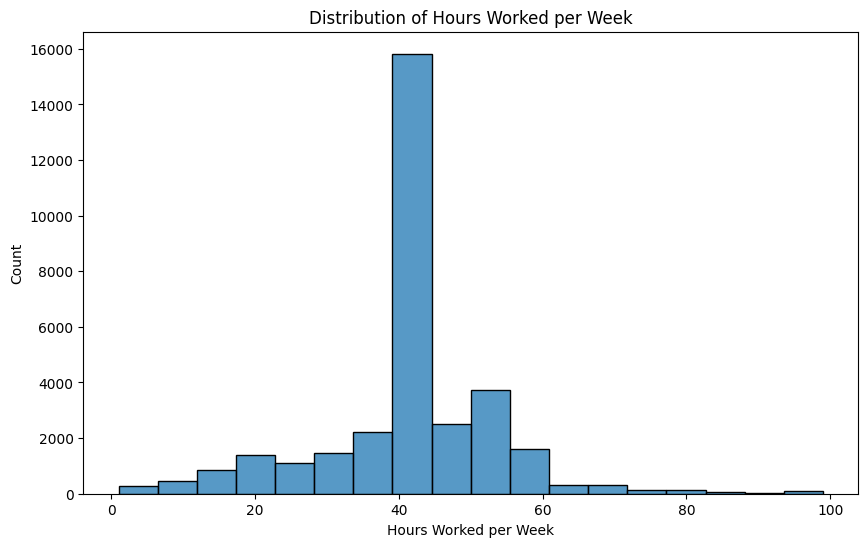

In [ ]:
# Create the histogram for 'hours-per-week' distribution using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Create the histogram for 'hours-per-week' distribution, colored by 'sex'
sns.histplot(
    data=df_subset,  # Your DataFrame
    x='hours-per-week',  # The column to plot
   
    kde=False,  # Set to True if you want to overlay a kernel density estimate
    palette='Set1',  # Use a Seaborn color palette similar to Plotly's Set1
    bins=18,  # Number of bins, can be adjusted based on your data
    stat='count'  # Use the count for the y-axis
)

# Set the title, x and y labels
plt.title('Distribution of Hours Worked per Week')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Count')

# Show the plot
plt.show()


#### _Using plotly.express for better interactivity_

In [ ]:
# Create the interactive histogram for 'hours-per-week' distribution
fig4 = px.histogram(
    df_subset,  # Use the cleaned subset of the dataset
    x='hours-per-week',
    title='Distribution of Hours Worked per Week',
    labels={'hours-per-week': 'Hours Worked per Week'},
    color='sex',  # Color the bars based on the 'sex' column to differentiate between male and female
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a color sequence for gender differentiation
)

# Update layout for better visualization
fig4.update_layout(
    xaxis_title="Hours Worked per Week",
    yaxis_title="Count",
    template="plotly_white",
    bargap=0.1  # Adjust the gap between bars for better clarity
)

# Show the interactive plot
fig4.show()

#### _Watching on github? please go to the images folder to see the output for plotty.express interactive graph._

___
### **_Interpretation of Histogram for Hours Worked per Week_**

- **The largest group**: The **40-hour work week** group is the most populous, reflecting a large portion of **full-time workers** typically working standard hours.
  
- **Moderate work hours**: The **30-40 hours** and **20-30 hours** groups represent individuals who likely work close to full-time or part-time, with variations depending on job flexibility and industry.

- **Higher work hours**: A smaller but notable number of people fall into the **50-60 hours** category, indicating professionals or individuals with demanding jobs or overtime.And above 60 hours very small number of people, indicating those with extremely demanding jobs or those who work multiple jobs.

- **Lower work hours**: The **0-10 hours** and **10-20 hours** groups reflect part-time workers, students, or retirees, with fewer individuals working very short hours.


### **Key Observations**:
The distribution highlights a clear dominance of individuals working **around 40 hours per week**, with fewer people working significantly higher or lower hours. Part-time workers and those with flexible schedules are represented in the **lower hour ranges** (10-20 hours), while those working **longer hours** (50-60) are less common but still notable. 

Overall, a larger portion of the population falls within the **standard work hours**, and there is a noticeable **gender imbalance**, with **more males** than females in almost all work hour categories.
___